In [2]:
import pandas as pd
import numpy as np
idx = pd.IndexSlice
% matplotlib inline 
from util import error_function, get_simple_pred, get_quantil_pred
%load_ext autoreload
%autoreload 2

In [3]:
train = pd.read_csv('data/train.csv',parse_dates=['Date'])
test = pd.read_csv('data/test.csv',parse_dates=['Date'])

train = train.set_index(['Date','City'])
train = train.sort_index()

train['day_of_week'] = train.index.get_level_values('Date').weekday_name

last_day_in_index = train.index.get_level_values('Date').max()
new_last_day_train = last_day_in_index - pd.DateOffset(days=7)
new_first_day_test = last_day_in_index - pd.DateOffset(days=6)
new_last_day_test = last_day_in_index - pd.DateOffset(days=3)
new_train = train.loc[idx[:new_last_day_train, :], :]
new_test = train.loc[idx[new_first_day_test:new_last_day_test, :], :]
new_test = new_test.reset_index()

In [4]:
new_train = new_train[new_train['Hospital active']==1]

In [5]:
df_quantil_Sun = new_train.groupby(['City','day_of_week'])['Nr_patients'].quantile(q=1)

In [6]:
df_quantil_Mon = new_train.groupby(['City','day_of_week'])['Nr_patients'].quantile(q=0.90)

In [7]:
df_quantil_Tue = new_train.groupby(['City','day_of_week'])['Nr_patients'].quantile(q=0.93)

In [8]:
df_quantil_Wen = new_train.groupby(['City','day_of_week'])['Nr_patients'].quantile(q=0.9427)

In [9]:
df_mean = new_train.groupby('City')['Nr_patients'].max()
df_mean = pd.DataFrame(df_mean)

In [10]:
new_test['nr_doctors'] = new_test.apply(get_quantil_pred, axis=1,args=(df_quantil_Sun,df_quantil_Mon,df_quantil_Tue,df_quantil_Wen))

hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


In [11]:
print(error_function(new_test['Nr_patients'],new_test['nr_doctors']))

5727.0


In [12]:
new_test.groupby('Date').sum()

,Doctors allocated,Nr_patients,Deaths from lack of doctors,National Holiday,News on local media about deseases,Students on Holiday,Hospital active,nr_doctors
Date,,,,,,,,
2018-05-13,1749,9549,0.0,0,0,0,12,16819
2018-05-14,39665,230834,0.0,0,0,9,307,19908
2018-05-15,39665,225278,0.0,0,0,9,307,19907
2018-05-16,39665,265665,0.0,0,0,9,307,19913


In [13]:
test['nr_doctors'] = test.apply(get_quantil_pred, axis=1,args=(df_quantil_Sun,df_quantil_Mon,df_quantil_Tue,df_quantil_Wen))


hello
hello
hello
hello
hello
hello
hello
hello
hello
hello


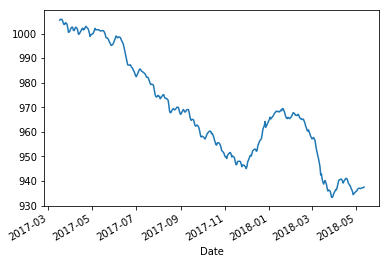

In [20]:
df = new_train.loc[idx[:,'Guarda'],'Nr_patients']
df.index = df.index.droplevel(1)
df.rolling(365).mean().plot()

In [154]:
test.groupby('Date').sum()

,Hospital active,nr_doctors
Date,,
2018-05-20,12,16819
2018-05-21,308,19992
2018-05-22,308,19990
2018-05-23,308,19993


In [156]:
test.iloc[429]

Date               2018-05-21 00:00:00
City                            Lisboa
Hospital active                      1
nr_doctors                         239
Name: 429, dtype: object

In [166]:
test[test.City=='Lisboa']
test.loc[429,'nr_doctors']

239

In [167]:
test.loc[429,'nr_doctors'] = test.loc[429,'nr_doctors'] + 8
test.loc[737,'nr_doctors'] = test.loc[737,'nr_doctors'] + 10
test.loc[1045,'nr_doctors'] = test.loc[1045,'nr_doctors'] + 7

In [168]:
test.groupby('Date').sum()

,Hospital active,nr_doctors
Date,,
2018-05-20,12,16819
2018-05-21,308,20000
2018-05-22,308,20000
2018-05-23,308,20000


In [169]:
test.drop(columns=['Hospital active']).to_csv('submission4.csv',index=False)

In [16]:
tes.sort_values('diff', ascending=False)


NameError: name 'tes' is not defined